## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import tensorflow as tf
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from tensorflow.keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tf.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = tf.keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [9]:
# 載入 Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(factor=0.1, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=10, 
                              verbose=1)

In [12]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 43/50
50000/50000 [==============================] - 5s 96us/sample - loss: 0.7331 - acc: 0.7689 - val_loss: 1.4939 - val_acc: 0.4979
Epoch 44/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.7301 - acc: 0.7707 - val_loss: 1.4935 - val_acc: 0.5003
Epoch 45/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.7292 - acc: 0.7716 - val_loss: 1.4939 - val_acc: 0.5009
Epoch 46/50
50000/50000 [==============================] - 5s 98us/sample - loss: 0.7277 - acc: 0.7718 - val_loss: 1.4943 - val_acc: 0.5014
Epoch 47/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.7269 - acc: 0.7721 - val_loss: 1.4945 - val_acc: 0.5006
Epoch 48/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.7278 - acc: 0.7714 - val_loss: 1.4946 - val_acc: 0.5010
Epoch 49/50
50000/50000 [==============================] - 5s 96us/sample - loss: 0.7276 - acc: 0.7720 - val_loss: 1.4948 - val_acc: 0.5020
Epoch 50/50
50000/50

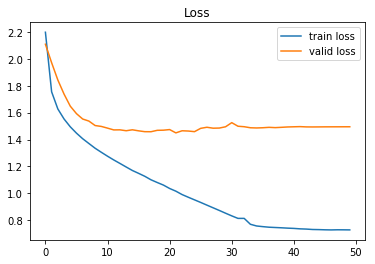

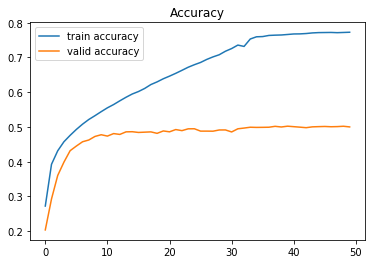

In [13]:
# 繪製結果
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [14]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 128)               512       
__________

50000/50000 [==============================] - 6s 112us/sample - loss: 0.4003 - acc: 0.8923 - val_loss: 1.5082 - val_acc: 0.5366
Epoch 46/50
50000/50000 [==============================] - 5s 109us/sample - loss: 0.4009 - acc: 0.8917 - val_loss: 1.5082 - val_acc: 0.5365
Epoch 47/50
50000/50000 [==============================] - 6s 121us/sample - loss: 0.4008 - acc: 0.8916 - val_loss: 1.5085 - val_acc: 0.5366
Epoch 48/50
50000/50000 [==============================] - 5s 109us/sample - loss: 0.4008 - acc: 0.8920 - val_loss: 1.5085 - val_acc: 0.5366
Epoch 49/50
50000/50000 [==============================] - 6s 113us/sample - loss: 0.4011 - acc: 0.8911 - val_loss: 1.5089 - val_acc: 0.5358
Epoch 50/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.4009 - acc: 0.8903
Epoch 00050: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
50000/50000 [==============================] - 6s 117us/sample - loss: 0.4010 - acc: 0.8904 - val_loss: 1.5090 - val_acc: 0.5360


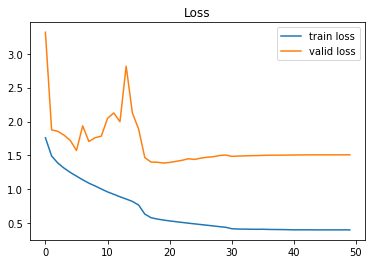

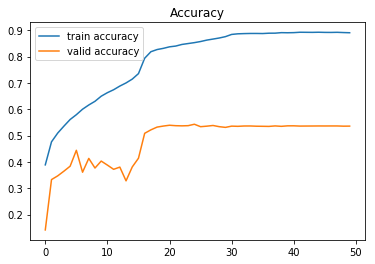

In [15]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [16]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = tf.keras.optimizers.RMSprop(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v1_8 (Ba (None, 128)               512       
__________

50000/50000 [==============================] - 5s 102us/sample - loss: 0.3006 - acc: 0.9246 - val_loss: 1.6267 - val_acc: 0.5403
Epoch 47/50
50000/50000 [==============================] - 5s 103us/sample - loss: 0.2987 - acc: 0.9260 - val_loss: 1.6273 - val_acc: 0.5405
Epoch 48/50
50000/50000 [==============================] - 6s 121us/sample - loss: 0.2981 - acc: 0.9265 - val_loss: 1.6307 - val_acc: 0.5401
Epoch 49/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.2975 - acc: 0.9260
Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
50000/50000 [==============================] - 5s 108us/sample - loss: 0.2977 - acc: 0.9260 - val_loss: 1.6304 - val_acc: 0.5394
Epoch 50/50
50000/50000 [==============================] - 6s 117us/sample - loss: 0.2950 - acc: 0.9273 - val_loss: 1.6313 - val_acc: 0.5391


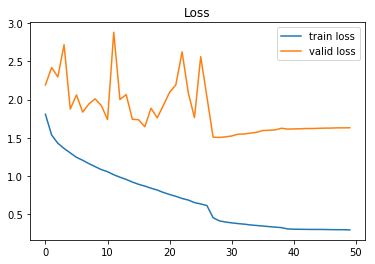

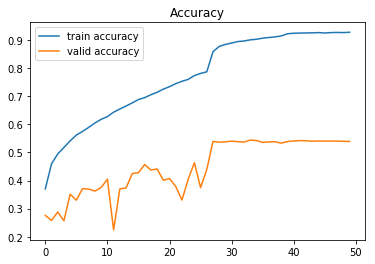

In [17]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()